# Programming Assignment 2
# <span style="font-family: Arial; color: #2e86c1; font-size: 25px;">Linear Regression</span>

### <span style="font-family: Arial; color: darkslategray;">By: Beanca A. Manaog & Julian Gabrielo B. Sales</span>
### <span style="font-family: Arial; color: darkslategray;">Subject: ECE Electives 1 - Emerging Technologies</span>

<hr style="border: 1px solid #ccc;" />


<span style="color: green; font-weight: bold; font-size: large">Introduction</span>
#### In this assignment, we will train a model using Linear Regression to predict the heating load of buildings based on their architectural characteristics. Using the Energy Efficiency dataset from the UCI Machine Learning Repository, which consists of 768 simulated building samples with 8 input features (X1 to X8) and 2 target outputs (Y1 and Y2), we will focus on predicting the heating load (Y1). Through this process, we will explore the impact of Ridge regularization to improve model accuracy, analyze the effects of feature removal, and evaluate the model’s performance using validation and test sets.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
sns.set()

In [13]:
# Load the dataset
data = pd.read_excel('ENB2012_data.xlsx')

# Rename columns for better visualization
data.columns = [
    "Relative Compactness (X1)", "Surface Area (X2)", "Wall Area (X3)", "Roof Area (X4)", 
    "Overall Height (X5)", "Orientation (X6)", "Glazing Area (X7)", "Glazing Area Distribution (X8)", 
    "Heating Load (Y1)", "Cooling Load (Y2)"
]

# Separate features and target variables
X = data.iloc[:, :8]  # Features (X1 to X8)
y = data["Heating Load (Y1)"]  # Target variable (Y1)

# Display the first few rows of the updated dataset
styled_data_table = data.head().to_html(index=False)

# Add styling for better visualization
styled_html_data_table = f"""
    <style>
        table {{
            width: 90%;
            margin: 25px auto;
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }}
        th {{
            padding: 12px;
            text-align: center;
            background-color: #4CAF50;
            color: white;
        }}
        td {{
            padding: 12px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }}
        tr:hover {{background-color: #f1f1f1;}}
    </style>
    {styled_data_table}
"""

# Display the updated table
display(HTML(styled_html_data_table))


Relative Compactness (X1),Surface Area (X2),Wall Area (X3),Roof Area (X4),Overall Height (X5),Orientation (X6),Glazing Area (X7),Glazing Area Distribution (X8),Heating Load (Y1),Cooling Load (Y2)
0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### <span style="color: #2e86c1; font-size: 17px;">1.  Split the samples into 60% training, 20% validation, and 20% testing data at random </span>

In [14]:
# Split the data into 60% training, 20% validation, and 20% test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Confirm the sizes of the datasets
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

# Convert the results to a DataFrame
dataset_split = pd.DataFrame({
    'Dataset': ['Training set', 'Validation set', 'Test set'],
    'Samples': [X_train.shape[0], X_val.shape[0], X_test.shape[0]],
    'Features': [X_train.shape[1], X_val.shape[1], X_test.shape[1]]
})

# Convert the DataFrame to an HTML table with custom styling
html_split_results = dataset_split.to_html(index=False)

styled_html_split_results = f"""
    <style>
        table {{
            width: 50%;
            margin: 25px auto;
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }}
        th {{
            padding: 12px;
            text-align: center;
            background-color: #4CAF50;
            color: white;
        }}
        td {{
            padding: 12px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }}
        tr:hover {{background-color: #f1f1f1;}}
    </style>
    {html_split_results}
"""

# Display the styled HTML table
display(HTML(styled_html_split_results))



Training set: (460, 8), Validation set: (154, 8), Test set: (154, 8)


Dataset,Samples,Features
Training set,460,8
Validation set,154,8
Test set,154,8


### <span style="color: #2e86c1; font-size: 17px;">2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2)</span>


In [7]:
# Define 10 different Ridge regularization parameters (alphas)
alphas = np.logspace(-4, 4, 10)

best_alpha = None
best_model = None
best_r2_val = -np.inf

# Train Ridge models with different alpha values and evaluate on validation set
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on validation set and calculate R2 score
    y_val_pred = model.predict(X_val)
    r2_val = r2_score(y_val, y_val_pred)
    
    # Update the best model if this one performs better on validation data
    if r2_val > best_r2_val:
        best_r2_val = r2_val
        best_alpha = alpha
        best_model = model

print(f'Best alpha: {best_alpha}, Validation R2: {best_r2_val}')

# Store the results in a DataFrame
ridge_results = pd.DataFrame({
    'Metric': ['Best Alpha', 'Validation R²'],
    'Value': [best_alpha, best_r2_val]
})

# Convert the DataFrame to an HTML table with custom styling
html_ridge_results = ridge_results.to_html(index=False)

styled_html_ridge_results = f"""
    <style>
        table {{
            width: 40%;
            margin: 25px auto;
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }}
        th {{
            padding: 12px;
            text-align: center;
            background-color: #4CAF50;
            color: white;
        }}
        td {{
            padding: 12px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }}
        tr:hover {{background-color: #f1f1f1;}}
    </style>
    {html_ridge_results}
"""

# Display the styled HTML table
display(HTML(styled_html_ridge_results))



Best alpha: 0.0001, Validation R2: 0.9050212036135086


Metric,Value
Best Alpha,0.000100
Validation R²,0.905021


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The best alpha value was **0.0001**, giving a **Validation R² score of 0.9050**. This means the model is good at predicting heating load, explaining about **90.5%** of the variation in the validation data. This alpha value helps prevent the model from being too complex or too simple.

### <span style="color: #2e86c1; font-size: 17px;">3. Make one final evaluation on the test data</span>

In [8]:
# Predict on test data and evaluate R2 score
y_test_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test R2 score: {r2_test:.4f}')

# Create a DataFrame to hold the result
test_results = pd.DataFrame({
    'Metric': ['Test R² Score'],
    'Value': [round(r2_test, 4)]  # Round to 4 decimal places
})

# Convert the DataFrame to an HTML table with custom styling
html_test_results = test_results.to_html(index=False)

styled_html_test_results = f"""
    <style>
        table {{
            width: 40%;
            margin: 25px auto;
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }}
        th {{
            padding: 12px;
            text-align: center;
            background-color: #4CAF50;
            color: white;
        }}
        td {{
            padding: 12px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }}
        tr:hover {{background-color: #f1f1f1;}}
    </style>
    {html_test_results}
"""

# Display the styled HTML table
display(HTML(styled_html_test_results))


Test R2 score: 0.9196


Metric,Value
Test R² Score,0.9196


### <span style="color: #2e86c1; font-size: 17px;">4. What are the best model’s coefficients, intercept, and its training, validation, and test accuracy?</span>

In [9]:
# Get the model's coefficients and intercept
coefficients = best_model.coef_
intercept = best_model.intercept_

print(f'Test R2: {r2_test}')
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Create a DataFrame to hold the results
model_results = pd.DataFrame({
    'Metric': ['Test R² Score', 'Intercept'] + [f'Coefficient (X{i+1})' for i in range(len(coefficients))],
    'Value': [round(r2_test, 4), round(intercept, 4)] + [round(coef, 4) for coef in coefficients]
})

# Convert the DataFrame to an HTML table with custom styling
html_model_results = model_results.to_html(index=False)

styled_html_model_results = f"""
    <style>
        table {{
            width: 60%;
            margin: 25px auto;
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }}
        th {{
            padding: 12px;
            text-align: center;
            background-color: #4CAF50;
            color: white;
        }}
        td {{
            padding: 12px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }}
        tr:hover {{background-color: #f1f1f1;}}
    </style>
    {html_model_results}
"""

# Display the styled HTML table
display(HTML(styled_html_model_results))



Test R2: 0.9195878238783721
Coefficients: [-5.98420732e+01 -5.71761056e-02  3.68818552e-02 -4.70263631e-02
  4.16220875e+00 -1.80745763e-02  2.01603359e+01  2.44157390e-01]
Intercept: 75.6626456279612


Metric,Value
Test R² Score,0.9196
Intercept,75.6626
Coefficient (X1),-59.8421
Coefficient (X2),-0.0572
Coefficient (X3),0.0369
Coefficient (X4),-0.0470
Coefficient (X5),4.1622
Coefficient (X6),-0.0181
Coefficient (X7),20.1603
Coefficient (X8),0.2442


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The most important feature affecting heating load is **Relative Compactness (X1)**, with more compact buildings needing less heating. **Glazing Area (X7)** also plays a big role, as more windows allow more sunlight to reduce heating needs. **Overall Height (X5)** slightly lowers heating load, while **Glazing Area Distribution (X8)** and **Surface Area (X2)** have much smaller effects. Overall, compact design and window area have the greatest impact on reducing heating demand.

### <span style="color: #2e86c1; font-size: 17px;">5. What are the top 5 features among X1 to X8?</span>

In [16]:
# Rename features to meaningful names
X.columns = [
    "Relative Compactness (X1)", "Surface Area (X2)", "Wall Area (X3)", "Roof Area (X4)", 
    "Overall Height (X5)", "Orientation (X6)", "Glazing Area (X7)", "Glazing Area Distribution (X8)"
]

# Rank features by the absolute value of their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Descriptive feature names
    'Coefficient': coefficients  # Corresponding coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Extract the top 5 features
top_5_features = feature_importance.head(5)

# Create an HTML table for better display
html_table = top_5_features.to_html(index=False)

# Add some basic styling
styled_html = f"""
    <style>
        table {{
            width: 60%;
            margin: 25px auto;
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }}
        th {{
            padding: 12px;
            text-align: center;
            background-color: #4CAF50;
            color: white;
        }}
        td {{
            padding: 12px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }}
        tr:hover {{background-color: #f9f9f9;}}
    </style>
    {html_table}
"""

# Display the formatted HTML table
display(HTML(styled_html))


Feature,Coefficient
Relative Compactness (X1),-59.842073
Glazing Area (X7),20.160336
Overall Height (X5),4.162209
Glazing Area Distribution (X8),0.244157
Surface Area (X2),-0.057176


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The most important feature affecting heating load is **Relative Compactness (X1)**, with more compact buildings needing less heating. **Glazing Area (X7)** also plays a big role, as more windows allow more sunlight to reduce heating needs. **Overall Height (X5)** slightly lowers heating load, while **Glazing Area Distribution (X8)** and **Surface Area (X2)** have much smaller effects. Overall, compact design and window area have the greatest impact on reducing heating demand.

### <span style="color: #2e86c1; font-size: 17px;">6. If you repeat the procedure above using only the 5 top features, what are the results? </span>

In [9]:
# Use only the top 5 features for training
top_5_X_train = X_train[top_5_features['Feature']]
top_5_X_val = X_val[top_5_features['Feature']]
top_5_X_test = X_test[top_5_features['Feature']]

# Train Ridge model with the best alpha found previously
top_5_model = Ridge(alpha=best_alpha)
top_5_model.fit(top_5_X_train, y_train)

# Evaluate on validation and test sets
y_val_pred_top5 = top_5_model.predict(top_5_X_val)
r2_val_top5 = r2_score(y_val, y_val_pred_top5)

y_test_pred_top5 = top_5_model.predict(top_5_X_test)
r2_test_top5 = r2_score(y_test, y_test_pred_top5)

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Metric': ['Validation R²', 'Test R²'],
    'Score': [r2_val_top5, r2_test_top5]
})

# Convert results to HTML and add custom styling
html_results = results.to_html(index=False)

styled_html_results = f"""
    <style>
        table {{
            width: 40%;
            margin: 25px auto;
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }}
        th {{
            padding: 12px;
            text-align: center;  /* Align headers to the left */
            background-color: #4CAF50;
            color: white;
        }}
        td {{
            padding: 12px;
            text-align: center;  /* Align data to the left */
            border-bottom: 1px solid #ddd;
        }}
        tr:hover {{background-color: #f1f1f1;}}
    </style>
    {html_results}
"""

# Display the styled HTML table
display(HTML(styled_html_results))


Metric,Score
Validation R²,0.898826
Test R²,0.907127


<span style="color: #B8860B; font-weight: bold">Insight:</span>

Using only the top 5 features, the model performed very well, achieving a validation R² score of **0.8988** and a test R² score of **0.9071**. This means the model can explain about **89.88%** and **90.71%** of the differences in the outcomes for the validation and test data, respectively. The high scores show that these features are very important for making accurate predictions. It also suggests that focusing on a smaller number of key features can lead to a simpler and more effective model. Overall, these results indicate that choosing the right features can greatly improve the model’s ability to predict outcomes.

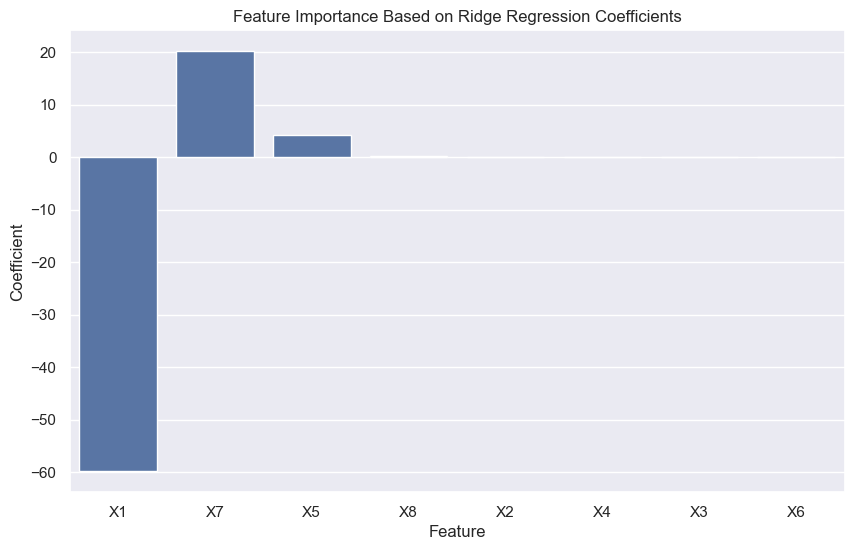

In [159]:
# Plot the coefficients for all features
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=feature_importance)
plt.title('Feature Importance Based on Ridge Regression Coefficients')
plt.show()


**Guide Questions**

### <span style="color: #2e86c1; font-size: 20px;">1. What is the impact of removing certain features on the model’s performance? </span>

Removing certain features from the model can have a big effect on how well it performs. In this case, using just the top 5 features still allowed the model to explain about **89.88%** of the results, showing that these features are very important for making accurate predictions. When less important features are taken out, the model can become simpler and work faster without losing accuracy, as shown by its strong scores. However, if really important features are removed, the model might do worse and have trouble explaining the results. Also, picking the right features can help make the model easier to understand and show which factors really matter. So, choosing the right features is key to making the model work well, keeping it simple, and ensuring the results are useful.

### <span style="color: #2e86c1; font-size: 20px;">2. Why is it necessary to split the data into training, validation, and testing sets? What could happen if this is skipped? </span>

Splitting data into training, validation, and testing sets is important for building a reliable model. The training set is used to teach the model, while the validation set helps adjust settings and check performance during training. The testing set is used to see how well the model performs on new data. Without this separation, the model could become too focused on the training data, leading to overfitting, where it does well on training but fails with unseen data. This process helps ensure that the model is effective and can handle real-world situations.

### <span style="color: #2e86c1; font-size: 20px;">3.1. How can the generalization ability of the model be assessed using the test data?</span>

The generalization ability of the model can be assessed using the test data because it contains samples that were not seen during training. By evaluating the model's R² score on the test data, we can measure how well the model performs on new, unseen data. This step is important to ensure that the model isn’t just memorizing the training data but is able to make accurate predictions when faced with real-world examples.



### <span style="color: #2e86c1; font-size: 20px;">3.2. What steps would you take to ensure the model generalizes well to unseen data?</span>

To make sure the model works well with new data, it’s important to use a validation set to fine-tune parameters like regularization. The dataset should also be large and varied so the model learns a wide range of patterns. Using methods like cross-validation during training can help test the model on different parts of the data. Lastly, applying techniques like Ridge regression can prevent the model from overfitting, which means it won’t just memorize the training data but will also perform well on unseen data.